<a href="https://colab.research.google.com/github/merndsel/Gradient-Boosting-Regressor/blob/main/Gradient%20Boosting%20Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.5.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Dataset

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/project/Extra/Extra4/train.csv')
test = pd.read_csv('/content/drive/MyDrive/project/Extra/Extra4/test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# EDA

# Handle Missing Values

In [ ]:
train_data = train.select_dtypes(include=['float64', 'int64'])
test_data = test.select_dtypes(include=['float64', 'int64'])

In [ ]:
train_data.isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0


In [ ]:
train_data = train_data.apply(lambda col:col.fillna(col.median()))
test_data = test_data.apply(lambda col:col.fillna(col.median()))

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

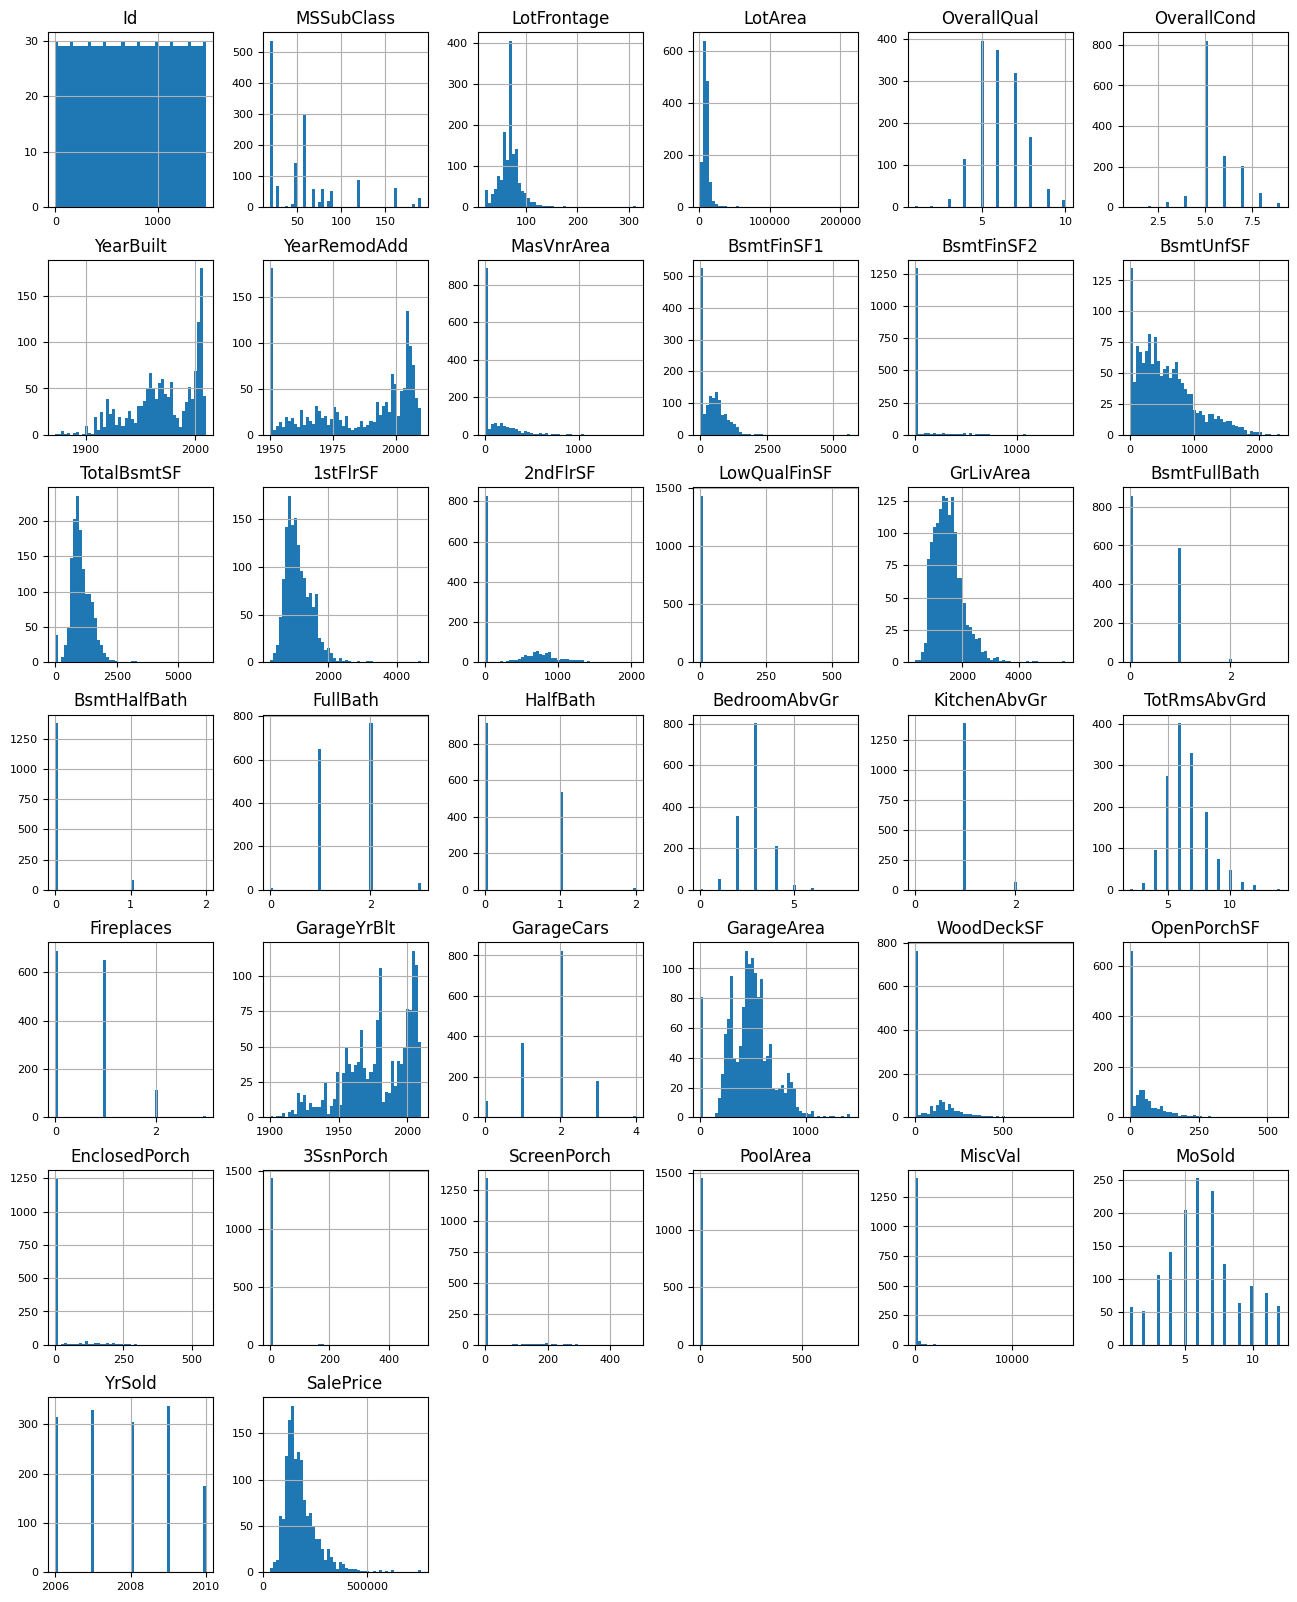

In [ ]:
train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Correlation Analysis

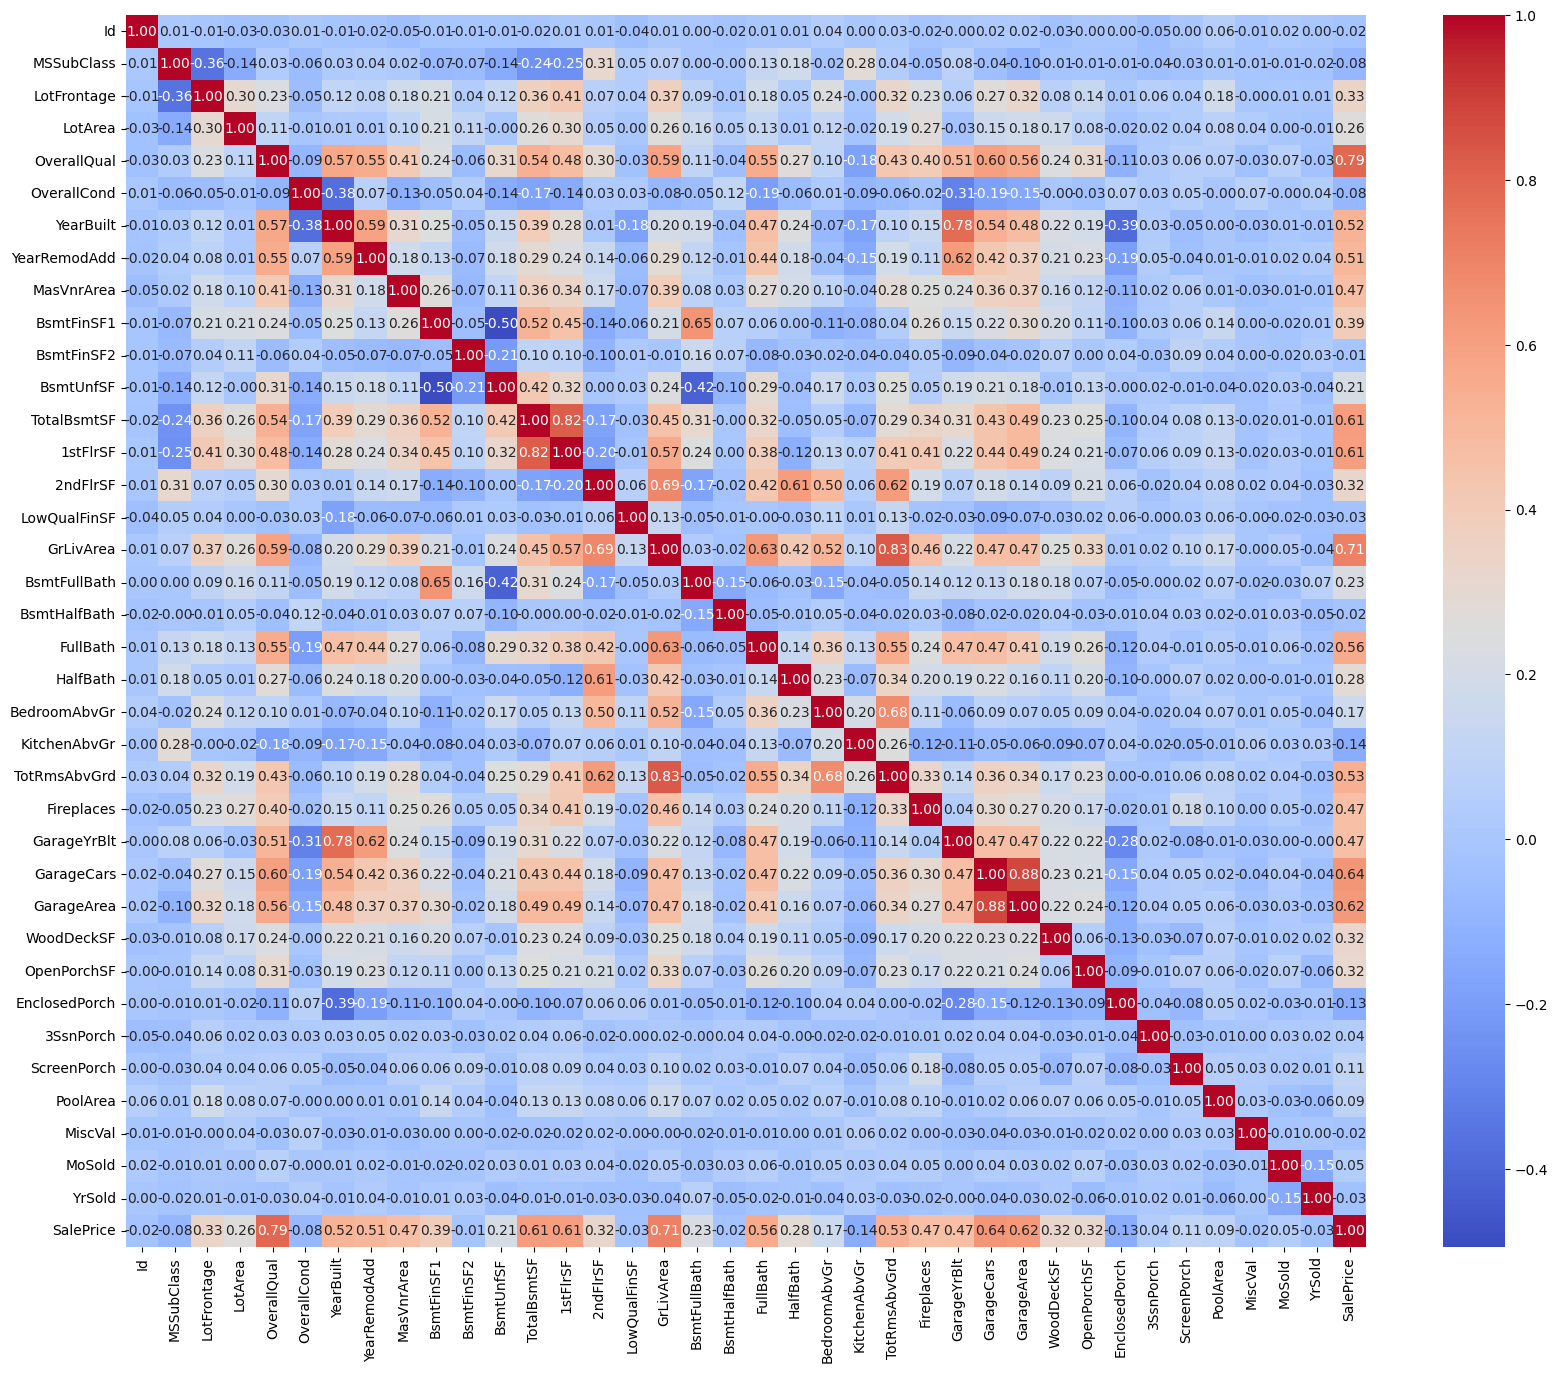

In [ ]:
#Plotting correlation heatmap
corr = train_data.corr()

#Plotting
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Correlation Analysis dilakukan karna berpengaruh terhadap proses regresion

In [ ]:
corr_with_target = train_data.corr()['SalePrice'].sort_values(ascending=False)
print(corr_with_target)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Selected Features berdasarkan nilai correlati yang tinggi :


* OverallQual   :   Overall material and finish quality
* GrLivArea     :   Above grade (ground) living area square feet
* GarageCars    :   Size of garage in car capacity
* GarageArea    :   Size of garage in square feet
* TotalBsmtSF   :   Total square feet of basement area
* 1stFlrSF     :    Total square feet of basement area
* FullBath     :    full bathrooms above grade
* TotRmsAbvGrd :    total rooms above grade
* YearBuilt    :    original construction date
* YearRemodAdd :    remodel date



In [ ]:
selected_features = [
    'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
    'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd'
]

## Modeling

In [ ]:
#split feature and target
x_train = train_data[selected_features]
y_train = train_data['SalePrice']

#Feature from test data
x_test = test_data[selected_features]

**GradientBoostingRegressor**

In [ ]:
# train model GradientBoostingRegressor
gb_model =  GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# predict on test data
y_pred_gb = gb_model.predict(x_test)

In [ ]:
# Evaluate the Model
mse_gb = mean_squared_error(y_train, gb_model.predict(x_train))
r2_gb = r2_score(y_train, gb_model.predict(x_train))
rmse_gb = np.sqrt(mse_gb)

print("GradienBoostingRegressor - MSE:", mse_gb)
print("GradienBoostingRegressor - R2:", r2_gb)
print("GradienBoostingRegressor - RMSE:", rmse_gb)

GradienBoostingRegressor - MSE: 427219412.8146884
GradienBoostingRegressor - R2: 0.932260387829216
GradienBoostingRegressor - RMSE: 20669.286703093756


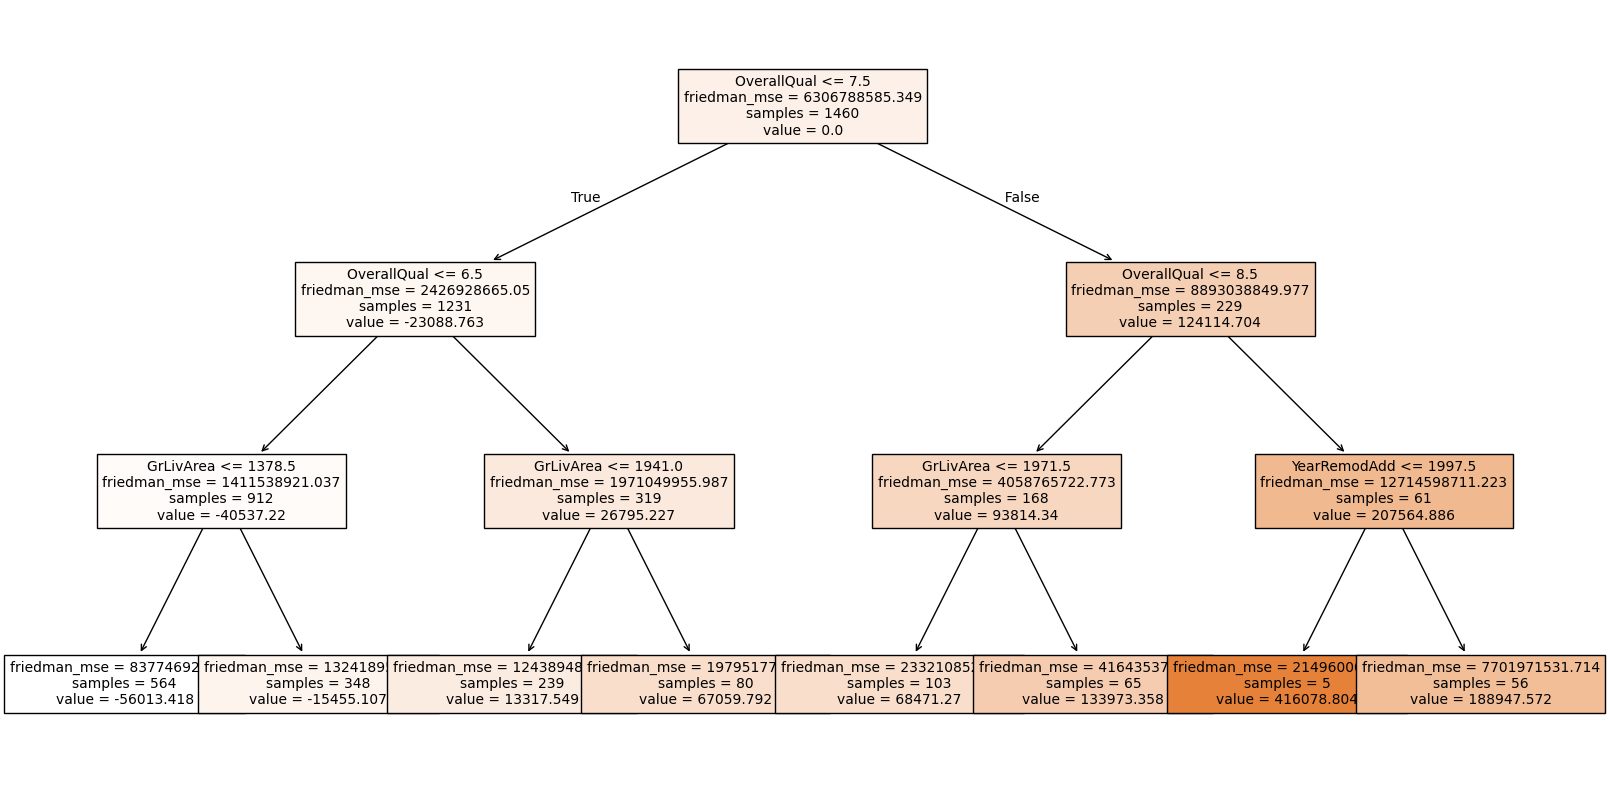

In [ ]:
# Tree Plotting GradientBoostingRegressor
plt.figure(figsize=(20, 10))
plot_tree(gb_model.estimators_[0, 0], filled=True, feature_names=x_train.columns, fontsize=10)
plt.show()

**Predict on Data**

In [ ]:
# Create Predict Dataframe
gb_output = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_pred_gb
})
print(gb_output.head())

     Id      SalePrice
0  1461  121560.800704
1  1462  143170.998257
2  1463  161933.710377
3  1464  178107.744601
4  1465  205933.860946


**XGBRegressor**

In [ ]:
# train model XGBRegressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

# predict on data test
y_pred_xgb = xgb_model.predict(x_test)

# evaluate the model
mse_xg = mean_squared_error(y_train, xgb_model.predict(x_train))
r2_xg = r2_score(y_train, xgb_model.predict(x_train))
rmse_xg = np.sqrt(mse_xg)

print("XGBoost - MSE:", mse_xg)
print("XGBoost - R2:", r2_xg)
print("XGBoost - RMSE:", rmse_xg)

XGBoost - MSE: 21633087.183410414
XGBoost - R2: 0.9965698719024658
XGBoost - RMSE: 4651.138267500807


**Predict on Data**

In [ ]:
# Create Predict Dataframe
xgb_output = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_pred_xgb
})
print(xgb_output.head())

     Id      SalePrice
0  1461  131924.015625
1  1462  151536.109375
2  1463  175403.453125
3  1464  181702.156250
4  1465  206944.937500


**Model Evaluate**

GradienBoostingRegressor :
* MSE: 427219412.8146883
* R2: 0.9322603878292162
* RMSE: 20669.286703093756

XGBoost :
* MSE: 21633087.183410414
* R2: 0.9965698719024658
* RMSE: 4651.138267500807

dari akurasi pada R2, XGBoost mencapau 99% sehingga lebih baik dibanding GradienBoostingRegressor

# Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Jumlah kombinasi parameter yang ingin diuji
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error', verbose=1)

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Jumlah kombinasi parameter yang ingin diuji
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Access the best parameters and create the tuned model
best_params = random_search.best_params_ #Store the best parameters from the search

tuned_model = xgb.XGBRegressor(**best_params, random_state=42) #Use best_params

tuned_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Definisikan model
xgb_model = XGBRegressor()

# Gunakan cross_val_score untuk melakukan validasi silang
scores = cross_val_score(
    estimator=xgb_model,
    X=x_train,  # Data fitur
    y=y_train,  # Label target
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Skor MSE negatif
    cv=5,  # Jumlah fold
    n_jobs=-1  # Gunakan semua core CPU
)

# Konversi skor negatif MSE menjadi positif
mse_scores = -scores
mean_mse = np.mean(mse_scores)

# Cetak hasil
print("MSE per fold:", mse_scores)
print("Mean MSE:", mean_mse)

MSE per fold: [9.69494900e+08 1.68674674e+09 1.12456835e+09 6.02838707e+08
 1.03572186e+09]
Mean MSE: 1083874110.7382066


Hasil Evaluasi
MSE per fold:

* Fold 1: 9.69 × 10⁸ (969,494,900)
* Fold 2: 1.69 × 10⁹ (1,686,746,740)
* Fold 3: 1.12 × 10⁹ (1,124,568,350)
* Fold 4: 6.03 × 10⁸ (602,838,707)
* Fold 5: 1.03 × 10⁹ (1,035,721,860)

Mean MSE: 1.08 × 10⁹ (1,083,874,110.74) Ini adalah rata-rata dari semua nilai MSE di setiap fold.

Analisis
Variasi Skor Antar Fold:

MSE antar fold memiliki variasi yang cukup besar (dari 6.03 × 10⁸ hingga 1.69 × 10⁹).
Hal ini mungkin disebabkan oleh perbedaan distribusi data antar fold. Jika dataset tidak seimbang, performa model bisa lebih buruk di beberapa fold.

Mean MSE yang Tinggi:
Nilai rata-rata MSE cukup besar, yang mungkin menunjukkan Target (y) memiliki skala besar, Model masih belum optimal untuk dataset tertentu,
Potensi Overfitting atau Underfitting.

